In [1]:
import numpy as np
import pandas as pd


### 1)Load in the appropriate csv file as a pandas dataframe 

In [2]:
df= pd.read_csv('Batting.csv')

In [3]:
#Filling null values with zeros
df=df.fillna(0)

### 2)	Print out the dimensions and info about the dataframe you just created 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102816 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102816 non-null float64
SB           102816 non-null float64
CS           102816 non-null float64
BB           102816 non-null int64
SO           102816 non-null float64
IBB          102816 non-null float64
HBP          102816 non-null float64
SH           102816 non-null float64
SF           102816 non-null float64
GIDP         102816 non-null

### 3)	How many players have hit 40 or more HRs in one single season? 

In [5]:
##Group by player ID and Year ID and sum homeruns 
fourty_more_hr= pd.DataFrame(df.pivot_table(values='HR',index=['playerID', 'yearID'],aggfunc= np.sum))

In [6]:
fourty_more_hr=fourty_more_hr.reset_index()

In [7]:

fourty_more_hr = fourty_more_hr[(fourty_more_hr['HR']>=40)]


In [8]:
fourty_more_hr['playerID'].nunique()

142

### 4)	How many players have hit more than 600 HRs for their career? (Dataframe)

In [9]:
##Grouping data with player id name last name and  adding the total homruns
by_player = pd.DataFrame(df.pivot_table(values='HR',index=['playerID','nameFirst','nameLast'],aggfunc= np.sum)).reset_index()

In [10]:
by_player = by_player[by_player['HR']>600]

In [11]:
by_player.reset_index(drop=True)

,playerID,nameFirst,nameLast,HR
0,aaronha01,Hank,Aaron,755
1,bondsba01,Barry,Bonds,762
2,griffke02,Ken,Griffey,630
3,mayswi01,Willie,Mays,660
4,rodrial01,Alex,Rodriguez,696
5,ruthba01,Babe,Ruth,714
6,sosasa01,Sammy,Sosa,609
7,thomeji01,Jim,Thome,612


### 5)	How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season? (Number Only)

In [12]:
##Grouping Data with player and year ID wise adding all other parameters
player_stat= pd.DataFrame(df.pivot_table(values=['H','2B','3B','HR'],index=['playerID','yearID'],aggfunc= np.sum)).reset_index()

In [13]:
player_stat= player_stat[((player_stat['H']>=200) & (player_stat['2B']>=40) & (player_stat['3B']>=10) & (player_stat['HR']>=30))]

In [14]:
#Sliced data as per the requirement and stored in the dataframe and using nun unique on player ID so as to count the number of 
# player with such record

In [15]:
player_stat['playerID'].nunique()

11

### 6)	How many players have had 100 or more SBs in a season? 

In [16]:
##Grouping players with year wise and adding SB
by_100_more_sb = pd.DataFrame(df.pivot_table(values='SB',index=['playerID','nameFirst','nameLast', 'yearID'],aggfunc= np.sum)).reset_index()

In [17]:
by_100_more_sb = by_100_more_sb[(by_100_more_sb['SB']>=100)]

In [18]:
by_100_more_sb= by_100_more_sb.drop_duplicates(subset='playerID', keep='first', inplace=False)

In [19]:
by_100_more_sb= by_100_more_sb.drop(['yearID','SB'], axis=1)

In [20]:
by_100_more_sb.reset_index(drop=True)

,playerID,nameFirst,nameLast
0,brocklo01,Lou,Brock
1,brownpe01,Pete,Browning
2,brownto01,Tom,Brown
3,colemvi01,Vince,Coleman
4,comisch01,Charlie,Comiskey
5,fogarji01,Jim,Fogarty
6,hamilbi01,Billy,Hamilton
7,henderi01,Rickey,Henderson
8,lathaar01,Arlie,Latham
9,nicolhu01,Hugh,Nicol


In [21]:
by_100_more_sb['playerID'].nunique()

12

### 7)	How many players in the 1960s have hit more than 200 HRs? (Dataframe)

In [22]:
##Grouping players year wise and adding home runs
hit_more_hr = pd.DataFrame(df.pivot_table(values='HR',index=['playerID','nameFirst','nameLast', 'yearID'],aggfunc= np.sum)).reset_index()

In [23]:
hit_more_hr= hit_more_hr[((hit_more_hr['yearID']>=1960)&(hit_more_hr['yearID']<=1969))]

In [24]:
hit_more_hr = hit_more_hr.groupby(['playerID','nameFirst','nameLast']).sum()

In [25]:
##Grouping the players and adding their homeruns for through out the 1960s and then storing those who have scored more than 200 home runs

In [26]:
hit_more_hr= hit_more_hr.drop(['yearID'],axis=1).reset_index()

In [27]:
hit_more_hr = hit_more_hr[(hit_more_hr['HR']>200)]

In [28]:
hit_more_hr.reset_index(drop=True)

,playerID,nameFirst,nameLast,HR
0,aaronha01,Hank,Aaron,375
1,allisbo01,Bob,Allison,225
2,bankser01,Ernie,Banks,269
3,cashno01,Norm,Cash,278
4,cepedor01,Orlando,Cepeda,254
5,colavro01,Rocky,Colavito,245
6,howarfr01,Frank,Howard,288
7,kalinal01,Al,Kaline,210
8,killeha01,Harmon,Killebrew,393
9,mantlmi01,Mickey,Mantle,256


In [29]:
hit_more_hr['playerID'].nunique()

19

### 8)	Who has hit the most HRs in history? (Dataframe)

In [30]:
##Grouping players and adding their career homeruns 
hrmax = pd.DataFrame(df.pivot_table(values='HR',index=['playerID','nameFirst','nameLast'],aggfunc= np.sum)).reset_index()

In [31]:
hrmax= hrmax[(hrmax['HR']== hrmax['HR'].max())]

In [32]:
hrmax.reset_index(drop= True)

,playerID,nameFirst,nameLast,HR
0,bondsba01,Barry,Bonds,762


### 9)	Who had the most hits in the 1970s? (Dataframe)

In [33]:
##Adding total hits season wise then slicing data for years of 1970s
hits = pd.DataFrame(df.pivot_table(values='H',index=['playerID','nameFirst','nameLast', 'yearID'],aggfunc= np.sum)).reset_index()

In [34]:
hits = hits[((hits['yearID']>=1970)&(hits['yearID']<=1979))]

In [35]:
hits = hits.groupby(['playerID','nameFirst','nameLast']).sum()

In [36]:
hits= hits.drop(['yearID'],axis=1).reset_index()

In [37]:
hits = hits[(hits['H']== hits['H'].max())]

In [38]:
hits.reset_index(drop=True)

,playerID,nameFirst,nameLast,H
0,rosepe01,Pete,Rose,2045


### Creating new columns for OBP,PA and Average

In [39]:
df = df.fillna(0)
df['PA']= df['HBP'] + df['AB']+df['SF'] +df['SH'] +df['BB']

df=df.fillna(0)

### 10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe)

In [40]:
## Slicing data for 1977 season then calculating OBP and finding the top 5 OBP with atleast 500 PAs
obp_top5 = df[df['yearID'] == 1977].pivot_table(values=['AB','SF','BB','HBP','H','PA'], index=['nameFirst','nameLast','playerID'],aggfunc='sum').reset_index()
obp_top5['OBP'] = (obp_top5['H']+obp_top5['BB']+obp_top5['HBP'])/(obp_top5['AB']+obp_top5['BB']+obp_top5['HBP']+obp_top5['SF'])
obp_top5[obp_top5['PA'] >= 500].dropna().sort_values(by='OBP',ascending=False).reset_index(drop=True).head(5)


,nameFirst,nameLast,playerID,AB,BB,H,HBP,PA,SF,OBP
0,Rod,Carew,carewro01,616,69,239,3.0,694.0,5.0,0.448773
1,Ken,Singleton,singlke01,536,107,176,2.0,651.0,6.0,0.437788
2,Reggie,Smith,smithre06,488,104,150,3.0,603.0,7.0,0.426910
3,Mike,Hargrove,hargrmi01,525,103,160,6.0,648.0,6.0,0.420312
4,Joe,Morgan,morgajo02,521,117,150,2.0,645.0,5.0,0.417054


### 11)	Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe)

In [41]:
##Slicing data for 2013 and then grouping data as per player and adding the total AB ,H,PA to caculate total home runs
avgtop = df[df['yearID'] == 2013].pivot_table(values=['AB','H','PA'], index=['nameFirst','nameLast','playerID'],aggfunc='sum').reset_index()
avgtop['Average'] = avgtop['H']/avgtop['AB']
avgtop[avgtop['PA'] >= 300].sort_values(by='Average',ascending=False).reset_index(drop=True).head(8)

,nameFirst,nameLast,playerID,AB,H,PA,Average
0,Miguel,Cabrera,cabremi01,555,193,652.0,0.347748
1,Hanley,Ramirez,ramirha01,304,105,336.0,0.345395
2,Michael,Cuddyer,cuddymi01,489,162,540.0,0.331288
3,Joe,Mauer,mauerjo01,445,144,508.0,0.323596
4,Mike,Trout,troutmi01,589,190,716.0,0.322581
5,Chris,Johnson,johnsch05,514,165,547.0,0.321012
6,Freddie,Freeman,freemfr01,551,176,629.0,0.319419
7,Yasiel,Puig,puigya01,382,122,432.0,0.319372


### 12)	Leaders in hits from 1940 up to and including 1949. (Dataframe)

In [42]:
hits = df[(df['yearID'] >= 1940) & (df['yearID'] < 1950)].pivot_table(values='H', index=['nameFirst','nameLast','playerID','yearID'],aggfunc='sum').reset_index()
i=1940
all_hits = pd.DataFrame()
#player with most hits in a year selected iteratively for years 1940 through 1949 and appended into a dataframe
while i < 1950:
    hits_i = hits[hits['yearID']== i][hits[hits['yearID']== i]['H'] == hits[hits['yearID']== i]['H'].max()]
    all_hits = all_hits.append(hits_i)
    i = i+1
all_hits.reset_index(drop=True)

,nameFirst,nameLast,playerID,yearID,H
0,Barney,McCosky,mccosba01,1940,200
1,Doc,Cramer,cramedo01,1940,200
2,Rip,Radcliff,radclri01,1940,200
3,Cecil,Travis,travice01,1941,218
4,Johnny,Pesky,peskyjo01,1942,205
5,Stan,Musial,musiast01,1943,220
6,Snuffy,Stirnweiss,stirnsn01,1944,205
7,Tommy,Holmes,holmeto01,1945,224
8,Stan,Musial,musiast01,1946,228
9,Johnny,Pesky,peskyjo01,1947,207


### 13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number)

In [43]:
nf = pd.DataFrame(df.pivot_table(values=['H'],index=['playerID','nameFirst','nameLast', 'yearID'],aggfunc= np.sum)).reset_index()
hital = nf.groupby(['yearID','playerID','nameFirst','nameLast']).sum()

In [44]:
#Grouping hits with year id and then finding the index for the highest number of hits and then counting the number of its occurence

In [45]:
hital=hital.reset_index()

In [46]:
idx = hital.groupby(['yearID'])['H'].transform(max) == hital['H']

In [47]:
nal=hital[idx]

In [48]:
nfs = pd.DataFrame(nal.pivot_table(values=['playerID'],index=['nameFirst','nameLast'],aggfunc= 'count')).reset_index()

In [49]:
nfs = nfs.rename(columns={'playerID': 'NumberOfTimes'})

In [50]:
nfs = nfs[(nfs['NumberOfTimes']== nfs['NumberOfTimes'].max())]

In [51]:
nfs.reset_index(drop=True)

,nameFirst,nameLast,NumberOfTimes
0,Ichiro,Suzuki,7
1,Pete,Rose,7
2,Ty,Cobb,7


### 14) Which players have played the most games for their careers?  Top 5, descending by games played presented as a dataframe

In [52]:
by_games = pd.DataFrame(df.pivot_table(values='G',index=['playerID','nameFirst','nameLast'],aggfunc= np.sum)).reset_index()

In [53]:
##Grouping players and adding the total games then finding the largest 5 games of the column games

In [54]:
by_games.nlargest(5, 'G').reset_index(drop=True)

,playerID,nameFirst,nameLast,G
0,rosepe01,Pete,Rose,3562
1,yastrca01,Carl,Yastrzemski,3308
2,aaronha01,Hank,Aaron,3298
3,henderi01,Rickey,Henderson,3081
4,cobbty01,Ty,Cobb,3035


### 15) How many players have had more than 3000 hits for their careers while also hitting 500 or more HRs?

In [55]:
byd = pd.DataFrame(df.pivot_table(values=['H','HR'],index=['playerID','nameFirst','nameLast'],aggfunc= np.sum)).reset_index()

In [56]:
##grouping players and adding their hits and home runs

In [57]:
player_hr_hits = byd[((byd['HR']>=500 ) & (byd['H']> 3000))]

In [58]:
player_hr_hits['playerID'].count()

5

In [59]:
player_hr_hits.reset_index(drop=True)

,playerID,nameFirst,nameLast,H,HR
0,aaronha01,Hank,Aaron,3771,755
1,mayswi01,Willie,Mays,3283,660
2,murraed02,Eddie,Murray,3255,504
3,palmera01,Rafael,Palmeiro,3020,569
4,rodrial01,Alex,Rodriguez,3115,696


### 16) How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [60]:
##Slicing data for year and then adding the homeruns for that year
hit = df[df['yearID']==1988]
hit.groupby('yearID')['HR'].sum()

yearID
1988    3180
Name: HR, dtype: int64

### 17) Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 ABs.  I would like a dataframe sorted by average.

In [61]:
boggs_top = df[(df['nameFirst']=='Wade') & (df['nameLast']=='Boggs')].pivot_table(values=['H','AB'], index=['nameFirst','nameLast','playerID','yearID'],aggfunc='sum').reset_index()


In [62]:
boggs_top['average'] = boggs_top['H']/boggs_top['AB']

In [63]:
## Grouped all the data as per wade boggs and added his total hits and AB then calculated his top 3 avg with more than 500 AB

In [64]:
boggs_top = boggs_top[(boggs_top['AB']>=500)]

In [65]:
boggs_top.nlargest(3,'average').reset_index(drop=True)

,nameFirst,nameLast,playerID,yearID,AB,H,average
0,Wade,Boggs,boggswa01,1985,653,240,0.367534
1,Wade,Boggs,boggswa01,1988,584,214,0.366438
2,Wade,Boggs,boggswa01,1987,551,200,0.362976


### 18) Please filter out the top OBPs for the 1995 season with at least 400 PAs, sorted by OBP.  I would like a dataframe for this

In [66]:
##Grouping data with players and adding the values required for calculating OBP and then slicing data for PA more than 400
obp = df[df['yearID'] == 1995].pivot_table(values=['AB','BB','H','HBP','SF','PA'], index=['nameFirst','nameLast','playerID'],aggfunc='sum').reset_index()
obp['OBP'] = (obp['H']+obp['BB']+obp['HBP'])/(obp['AB']+obp['BB']+obp['HBP']+obp['SF'])
obp[obp['PA'] >= 400].dropna().sort_values(by='OBP',ascending=False).reset_index(drop=True).head(5)

,nameFirst,nameLast,playerID,AB,BB,H,HBP,PA,SF,OBP
0,Edgar,Martinez,martied01,511,116,182,8.0,639.0,4.0,0.478873
1,Frank,Thomas,thomafr04,493,136,152,6.0,647.0,12.0,0.454405
2,Mark,McGwire,mcgwima01,317,88,87,11.0,422.0,6.0,0.440758
3,Jim,Thome,thomeji01,452,97,142,5.0,557.0,3.0,0.438061
4,Barry,Bonds,bondsba01,506,120,149,5.0,635.0,4.0,0.431496


### 19) Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with just the leader

In [67]:
##Finding total 3bs of all seasons and then finding the index for maximum and displaying in dataframe
bf = pd.DataFrame(df.pivot_table(values=['3B'],index=['playerID','nameFirst','nameLast', 'yearID'],aggfunc= np.sum)).reset_index()

In [68]:
bf= bf[((bf['yearID']==1922) | (bf['yearID']==1925) | (bf['yearID']==1926) | (bf['yearID']==1928))] 

In [69]:
ix = bf.groupby(['yearID'])['3B'].transform(max) == bf['3B']

In [70]:
bf[ix].sort_values('yearID').reset_index(drop=True)

,playerID,nameFirst,nameLast,yearID,3B
0,daubeja01,Jake,Daubert,1922,22
1,cuyleki01,Kiki,Cuyler,1925,26
2,wanerpa01,Paul,Waner,1926,22
3,combsea01,Earle,Combs,1928,21


### 20) How many players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [71]:
##Grouping players season wise then adding hr and sb
byd = pd.DataFrame(df.pivot_table(values=['HR','SB'],index=['yearID','playerID','nameFirst','nameLast'],aggfunc= np.sum)).reset_index()

In [72]:
byd= byd[((byd['SB']>=30) & (byd['HR']>=30))] 

In [73]:
byd['playerID'].nunique()

38

### 21) Who had the highest OBP is 1986 with at least 400 PAs? (Dataframe)

In [74]:
maxOBP = df[df['yearID'] == 1986].pivot_table(values=['AB','BB','H','HBP','SF','PA'], index=['nameFirst','nameLast','playerID'],aggfunc='sum').reset_index()
maxOBP['OBP'] = (maxOBP['H']+maxOBP['BB']+maxOBP['HBP'])/(maxOBP['AB']+maxOBP['BB']+maxOBP['HBP']+maxOBP['SF'])
maxOBP[maxOBP['PA'] >= 400].sort_values(by='OBP',ascending=False).reset_index(drop=True).head(1)

,nameFirst,nameLast,playerID,AB,BB,H,HBP,PA,SF,OBP
0,Wade,Boggs,boggswa01,580,105,207,0.0,693.0,4.0,0.45283


In [75]:
## Grouped the daya of 1986 then calculated the highest OBP by sorting the data and also for player with more than 400PA

### 22) Same question but for 1997 and only in the NL (check league ID)? (Dataframe)

In [76]:
nl = pd.DataFrame(df.pivot_table(values=['H','IBB','AB','SF','SH','BB','HBP'],index=['playerID','nameFirst','nameLast', 'yearID','lgID'],aggfunc= np.sum)).reset_index()

In [77]:

nl['PA']= nl['HBP'] + nl['AB']+nl['SF'] +nl['SH'] +nl['BB']
nl['AVG'] = nl['H']/nl['AB']
nl['OBP'] = (nl['H'] + nl['BB']+nl['HBP'] )/(nl['AB'] +nl['BB']+nl['HBP'] +nl['SF'])


In [78]:
##Slicing the data for season and PA and also League ID as NL

In [79]:
nl= nl[((nl['yearID']==1997) &(nl['PA']>=400)&(nl['lgID']== 'NL'))]

In [80]:
nl= nl[(nl['OBP']==nl['OBP'].max())]

In [81]:
nl.reset_index(drop=True)

,playerID,nameFirst,nameLast,yearID,lgID,AB,BB,H,HBP,IBB,SF,SH,PA,AVG,OBP
0,walkela01,Larry,Walker,1997,NL,568,78,208,14.0,14.0,4.0,0.0,664.0,0.366197,0.451807


### 23) Who had more than the league average HRs in 2012 (filter out all players with less 500 PAs)? (Dataframe)

In [82]:
HR_lgavg = df[df['yearID'] == 2012].pivot_table(values=['HR','PA'], index=['lgID','nameFirst','nameLast','playerID'],aggfunc='sum').reset_index()
leage_HR = pd.DataFrame()
#select the palyers with HR more than there respective leagues in the season, and iterate for all the leagues in 2012, and append the playerID and yearID into a new dataframe
for i in HR_lgavg['lgID'].unique():
    leage_HR = HR_lgavg[HR_lgavg['lgID']== i][HR_lgavg[HR_lgavg['lgID']== i]['HR'] > HR_lgavg[HR_lgavg['lgID']== i]['HR'].mean()]
    leage_HR = leage_HR.append(leage_HR)
leage_HR[leage_HR['PA']>=500].sort_values(by=['lgID','HR'],ascending=False).reset_index(drop=True)

,lgID,nameFirst,nameLast,playerID,HR,PA
0,NL,Ryan,Braun,braunry02,41,677.0
1,NL,Ryan,Braun,braunry02,41,677.0
2,NL,Giancarlo,Stanton,stantmi03,37,501.0
3,NL,Giancarlo,Stanton,stantmi03,37,501.0
4,NL,Jay,Bruce,bruceja01,34,633.0
5,NL,Jay,Bruce,bruceja01,34,633.0
6,NL,Adam,LaRoche,larocad01,33,647.0
7,NL,Adam,LaRoche,larocad01,33,647.0
8,NL,Alfonso,Soriano,soriaal01,32,615.0
9,NL,Carlos,Beltran,beltrca01,32,619.0


### 24) Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe)

In [83]:
yg = pd.DataFrame(df.pivot_table(values=['HR'],index=['yearID','playerID','nameFirst','nameLast','birthYear'],aggfunc= np.sum)).reset_index()

In [84]:
##Grouped data by season and birth year ,player id and then added their home runs

In [85]:
##Calculating age by subtracting year and birth year to calculate age at the time of season

In [86]:
yg['age'] = yg['yearID'] - yg['birthYear']

In [87]:
yg = yg[(yg['HR'] >=50)]

In [88]:
yg.nsmallest(1,'age').reset_index(drop=True)

,yearID,playerID,nameFirst,nameLast,birthYear,HR,age
0,2007,fieldpr01,Prince,Fielder,1984,50,23


### 25) Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe)

In [89]:
yr = pd.DataFrame(df.pivot_table(values=['HR'],index=['playerID','nameFirst','nameLast','birthYear','yearID'],aggfunc= np.sum)).reset_index()

In [90]:
##Grouping players season wise adding homeruns

In [91]:
yr['age'] = yr['yearID'] - yr['birthYear']

In [92]:
yr= yr.drop(['yearID','birthYear'],axis =1 )

In [93]:
##Group by age and the using csum to counting the cumulative sum of the home runs
youngesthr =yr.groupby(by=['playerID','nameLast','nameFirst','age']).sum().groupby(level=[0]).cumsum()

In [94]:
youngesthr=youngesthr.reset_index()

In [95]:
youngesthr = youngesthr[(youngesthr['HR']>= 300)]

In [96]:
##Keeping the first occurence of the player

In [97]:
youngesthr=youngesthr.drop_duplicates(subset='playerID', keep="first").reset_index(drop= True)

In [98]:
youngesthr.nsmallest(5,'age').reset_index(drop=True)

,playerID,nameLast,nameFirst,age,HR
0,foxxji01,Foxx,Jimmie,28,302
1,jonesan01,Jones,Andruw,28,301
2,ottme01,Ott,Mel,28,306
3,pujolal01,Pujols,Albert,28,319
4,rodrial01,Rodriguez,Alex,28,345


### B1) Graph total HRs per season using bar graph

In [99]:
##Here I have first used pivot table to group data and add the homeruns then for displaying for each season i have iterated
## through the x axis season wise 
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
thr = pd.DataFrame(df.pivot_table(values=['HR'],index=['yearID'],aggfunc= np.sum)).reset_index()

In [101]:
thr.head()

,yearID,HR
0,1871,47
1,1872,35
2,1873,46
3,1874,40
4,1875,40


In [102]:
##will act as x axis
reso_names = thr['yearID'].tolist()

In [103]:
##will act as y axis
reso_values = thr['HR'].tolist()

In [104]:
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt
from operator import itemgetter

In [105]:
rcParams.update({'figure.autolayout': True})
plt.figure(figsize=(14,9), dpi=600)

C:\Users\saura\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['Arial Black'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\saura\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


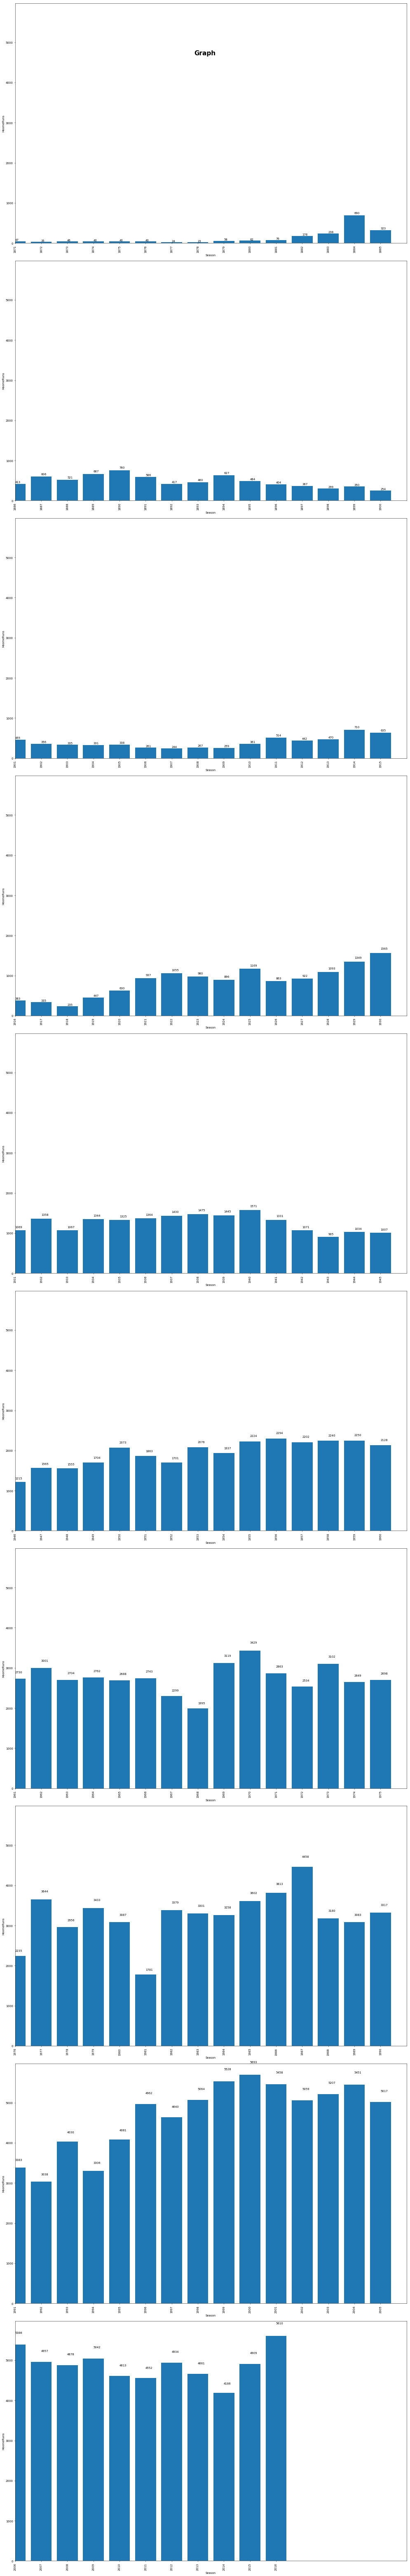

In [106]:
##This N is the number of times the iteration will run so as to divide the total seasons by that number
N=15
sublists_names = [reso_names[x:x+N] for x in range(0, len(reso_names), N)]
sublists_values = [reso_values[x:x+N] for x in range(0,len(reso_values), N)]

size = int(len(reso_values))
fig, axs = plt.subplots(nrows=size//N+1, sharey=True, figsize=(20,125), dpi=50)

fig.suptitle('Graph', 
          **{'family': 'Arial Black', 'size': 22, 'weight': 'bold'})


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='left', va='bottom')

for ax, names, values in zip(axs, sublists_names, sublists_values):
    x= ax.bar(range(len(values)), values, align='center')
    autolabel(x)
    ax.set_xlabel('Season')
    ax.set_ylabel('HoomeRuns')
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(names, rotation='vertical')
    ax.set_xlim(0, len(names))
    ax.set_xlim(0, N)


plt.show()


### B2) Using a line graph please graph the average HRs per AB (think about this) per season

In [107]:
yrg = pd.DataFrame(df.pivot_table(values=['HR','AB'],index=['yearID'],aggfunc= np.sum)).reset_index()

In [108]:
yrg.head()

,yearID,AB,HR
0,1871,10822,47
1,1872,15679,35
2,1873,16974,46
3,1874,19104,40
4,1875,26833,40


In [109]:
yrg['avghab'] = yrg['HR']/yrg['AB']

Text(0.5,1,'Average HR/AB per season')

C:\Users\saura\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


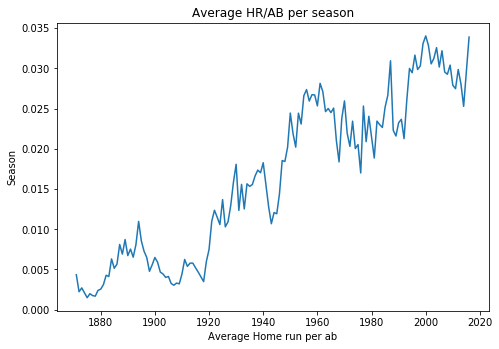

In [112]:
x= yrg['yearID']
y= yrg['avghab']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.set_xlabel('Average Home run per ab')
ax.set_ylabel('Season')
ax.set_title('Average HR/AB per season')